In [23]:
import numpy as np # linear algebra
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten ,MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras



In [24]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train = X_train / 255.0

In [26]:

def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

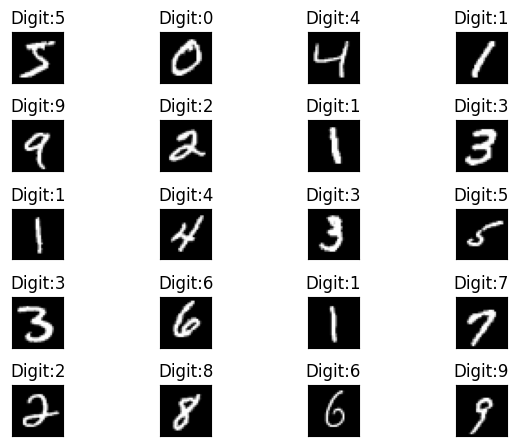

In [27]:
plot_digits(X_train, Y_train)

In [28]:
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [29]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [30]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [31]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [32]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [33]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [34]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=5, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Epoch 1/5


<ipython-input-34-0f72216af392>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100,


581/582 [============================>.] - ETA: 0s - loss: 0.5723 - accuracy: 0.8294

582/582 [==============================] - 19s 31ms/step - loss: 0.5715 - accuracy: 0.8297 - val_loss: 0.1696 - val_accuracy: 0.9494 - lr: 5.0000e-04
Epoch 2/5
581/582 [============================>.] - ETA: 0s - loss: 0.1806 - accuracy: 0.9457

582/582 [==============================] - 20s 35ms/step - loss: 0.1806 - accuracy: 0.9456 - val_loss: 0.0866 - val_accuracy: 0.9722 - lr: 5.0000e-04
Epoch 3/5
582/582 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9598

582/582 [==============================] - 18s 31ms/step - loss: 0.1311 - accuracy: 0.9598 - val_loss: 0.0643 - val_accuracy: 0.9806 - lr: 5.0000e-04
Epoch 4/5
581/582 [============================>.] - ETA: 0s - loss: 0.1090 - accuracy: 0.9666

582/582 [==============================] - 19s 32ms/step - loss: 0.1089 - accuracy: 0.9666 - val_loss: 0.0595 - val_accuracy: 0.9794 - lr: 5.0000e-04
Epoch 5/5
581/582 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9708

582/582 [==============================] - 19s 32ms/step - loss: 0.0954 - accuracy: 0.9708 - val_loss: 0.0564 - val_accuracy: 0.9811 - lr: 5.0000e-04


In [35]:
score = model.evaluate(X_val, T_val, batch_size=32)

57/57 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9811


In [36]:
score

[0.05639983341097832, 0.9811111092567444]